# Multiple Linear Regression 
## Using Diabetes Dataset


*THIS NOTEBOOK NEED FURTHER EDITTING*

This example contains all componets to import data, prepare it, fit and test it using linear regression model. Detailed information needs to be inserted 

### Loading the Data

In [47]:
# enable Matplotlib in this notebook
%matplotlib inline
from sklearn.datasets import load_diabetes

In [3]:
betes = load_diabetes()

### Displaying the Dataset’s Description

In [4]:
print(betes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [5]:
betes.data.shape

(442, 10)

In [6]:
betes.target.shape

(442,)

In [7]:
betes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

## Explore Data

In [8]:
import pandas as pd

In [9]:
pd.set_option('precision', 4)

In [10]:
pd.set_option('max_columns', 9)

In [11]:
pd.set_option('display.width', None)

In [12]:
betes_df = pd.DataFrame(betes.data, 
                              columns=betes.feature_names)
 

In [13]:
betes_df['MedValue'] = pd.Series(betes.target)

In [14]:
betes_df.head()

,age,sex,bmi,bp,...,s4,s5,s6,MedValue
0,0.0381,0.0507,0.0617,0.0219,...,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,...,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,...,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,...,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,...,-0.0026,-0.0320,-0.0466,135.0


In [15]:
betes_df.describe()

,age,sex,bmi,bp,...,s4,s5,s6,MedValue
count,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,...,4.4200e+02,4.4200e+02,4.4200e+02,442.0000
mean,-3.6343e-16,1.3083e-16,-8.0453e-16,1.2817e-16,...,3.7773e-16,-3.8309e-16,-3.4129e-16,152.1335
std,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,...,4.7619e-02,4.7619e-02,4.7619e-02,77.0930
min,-1.0723e-01,-4.4642e-02,-9.0275e-02,-1.1240e-01,...,-7.6395e-02,-1.2610e-01,-1.3777e-01,25.0000
25%,-3.7299e-02,-4.4642e-02,-3.4229e-02,-3.6656e-02,...,-3.9493e-02,-3.3249e-02,-3.3179e-02,87.0000
50%,5.3831e-03,-4.4642e-02,-7.2838e-03,-5.6706e-03,...,-2.5923e-03,-1.9476e-03,-1.0777e-03,140.5000
75%,3.8076e-02,5.0680e-02,3.1248e-02,3.5644e-02,...,3.4309e-02,3.2433e-02,2.7917e-02,211.5000
max,1.1073e-01,5.0680e-02,1.7056e-01,1.3204e-01,...,1.8523e-01,1.3360e-01,1.3561e-01,346.0000


## Visualize Features 

In [16]:
sample_df = betes_df.sample(frac=0.1, random_state=11)

In [17]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns

In [19]:
sns.set(font_scale=2)

In [20]:
sns.set_style('whitegrid')                                    

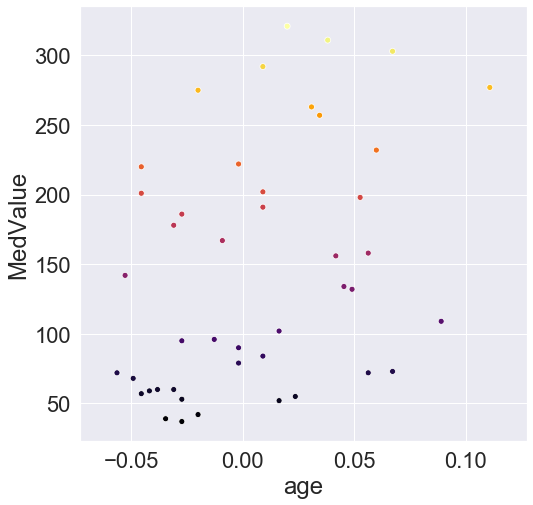

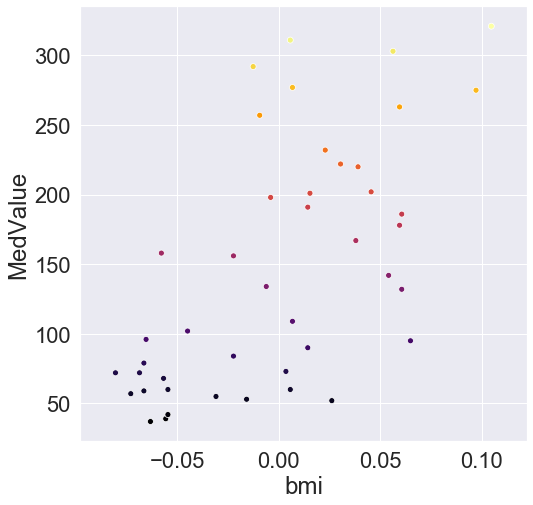

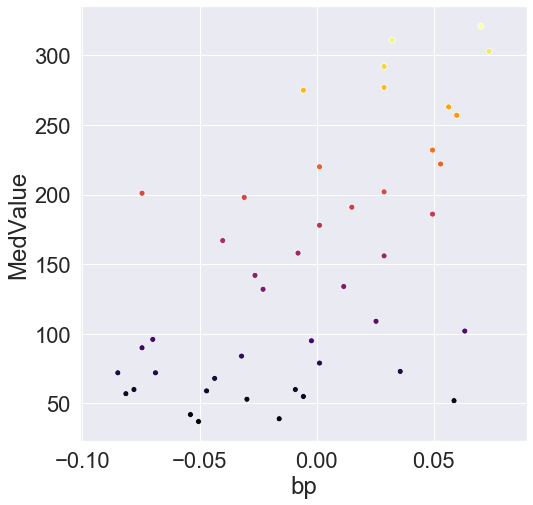

In [63]:
sex_age = ['age', 'bmi', 'bp']
for feature in sex_age:
    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=sample_df, x=feature, 
                    y='MedValue', hue='MedValue', 
                    palette='inferno', legend=False)


## Split Data for Training and Testing 

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
     betes.data, betes.target, random_state=10)

In [24]:
X_train.shape

(331, 10)

In [25]:
X_test.shape

(111, 10)

## Training

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
linear_regression = LinearRegression()

In [28]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
for i, name in enumerate(betes.feature_names):
     print(f'{name:>10}: {linear_regression.coef_[i]}')

       age: 6.787965875544836
       sex: -224.4013712010786
       bmi: 505.73157296506236
        bp: 319.36324522769576
        s1: -776.4394748624824
        s2: 396.90360031095867
        s3: 132.81783784475846
        s4: 308.92128510607574
        s5: 689.3948719674308
        s6: 53.88983466667986


In [30]:
linear_regression.intercept_

151.79830568841996

## Testing 

In [31]:
predicted = linear_regression.predict(X_test)

In [32]:
expected = y_test

In [33]:
predicted[:5]

array([148.0935172 , 204.2088566 , 184.34623371,  82.45213451,
       163.70008398])

In [34]:
expected[:5]

array([200., 202.,  67.,  80., 151.])

##  Expected vs. Predicted

In [35]:
df = pd.DataFrame()

In [36]:
df['Expected'] = pd.Series(expected)

In [37]:
df['Predicted'] = pd.Series(predicted)

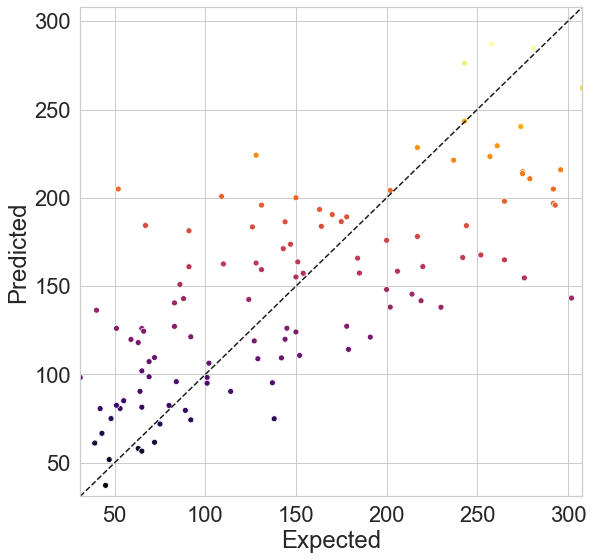

In [38]:
figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
     hue='Predicted', palette='inferno', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

## Model Metrics 
 

In [39]:
from sklearn import metrics

In [40]:
metrics.r2_score(expected, predicted)

0.528229572943083

In [41]:
metrics.mean_squared_error(expected, predicted)

2962.7137637037877

## Choose Best Model

In [42]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [43]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [44]:
from sklearn.model_selection import KFold, cross_val_score

In [45]:
for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=betes.data, y=betes.target, cv=kfold,
         scoring='r2')
     print(f'{estimator_name:>16}: ' + 
           f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421
